In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Procurando números primos

## Criando Dataset

In [30]:
df_primos = pd.read_csv("dataset-primos.csv")

In [31]:
df_primos = df_primos.sort_values(by="NumThreads")

# Salvar o dataset ordenado em um arquivo CSV
output_file = "dataset-primos.csv"
df_primos.to_csv(output_file, index=False)

## Questão 1

### a)

In [32]:
# Ordenar os dados pelo número de threads
uso_cpu = df_primos.sort_values(by="MeanUtilization", ascending=True)

# Exibir apenas as colunas desejadas
uso_cpu = uso_cpu[["NumThreads", "MeanUtilization"]]
display(uso_cpu)

,NumThreads,MeanUtilization
0,2,0.253655
1,4,0.507399
2,6,0.751138
4,10,0.979317
5,12,0.985529
9,20,0.987724
6,14,0.991642
7,16,0.992555
8,18,0.993064
3,8,0.993400


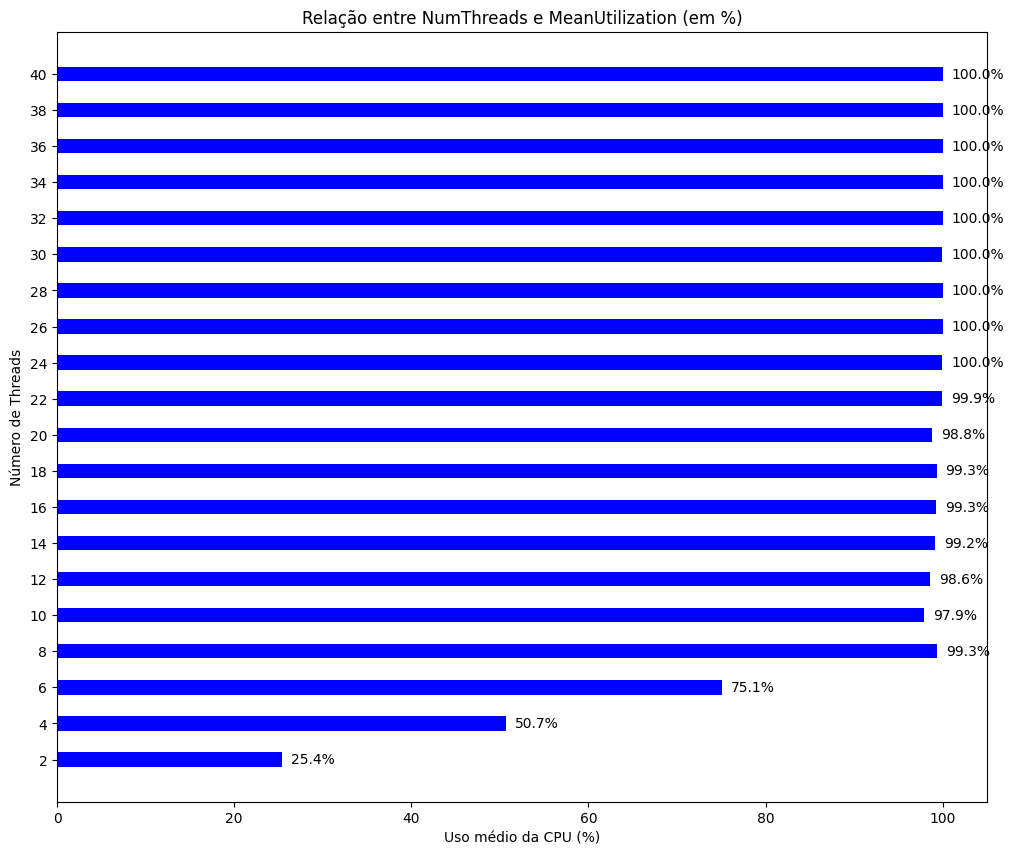

In [33]:
# Convertendo valores para porcentagem
df_primos["MeanUtilizationPercent"] = df_primos["MeanUtilization"] * 100

plt.figure(figsize=(12, 10))
bars = plt.barh(df_primos["NumThreads"], df_primos["MeanUtilizationPercent"], color='b')

# Adicionando os valores nas barras
for bar in bars:
    plt.text(
        bar.get_width() + 1,  # Posição horizontal (após a barra)
        bar.get_y() + bar.get_height() / 2,  # Centralizado verticalmente
        f'{bar.get_width():.1f}%',  # Valor formatado como porcentagem
        va='center'
    )

# Espaçamento entre as barras
num_threads = df_primos["NumThreads"]
plt.yticks(ticks=range(min(num_threads), max(num_threads) + 1, 2))

plt.title("Relação entre NumThreads e MeanUtilization (em %)")
plt.xlabel("Uso médio da CPU (%)")
plt.ylabel("Número de Threads")
plt.show()


### b)

In [34]:
# Ordenar os dados pelo número de threads
temp_total_exec = df_primos.sort_values(by="ElapsedTime", ascending=True)

# Exibir apenas as colunas desejadas
temp_total_exec = temp_total_exec[["NumThreads", "MeanUtilization","ElapsedTime"]]
display(temp_total_exec)

,NumThreads,MeanUtilization,ElapsedTime
19,40,1.000000,5218
18,38,1.000000,5251
15,32,1.000000,5293
17,36,1.000000,5311
14,30,0.999592,5355
9,20,0.987724,5378
8,18,0.993064,5415
16,34,0.999792,5454
12,26,0.999792,5456
13,28,1.000000,5485


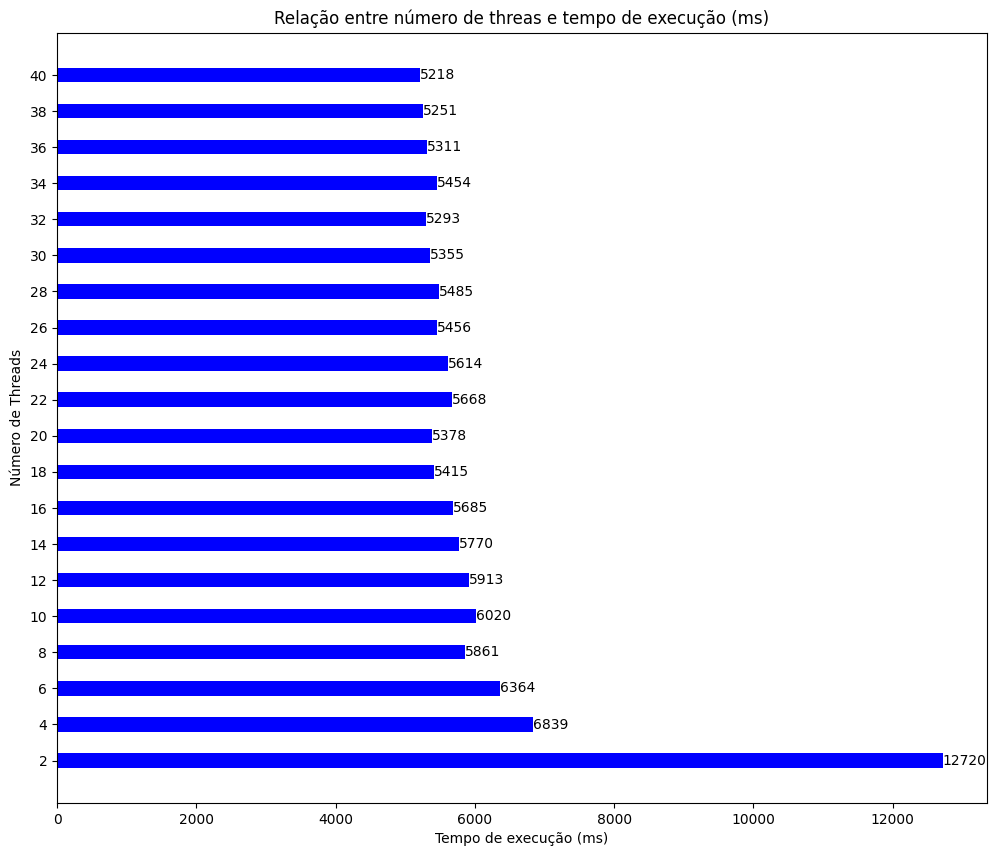

In [35]:
plt.figure(figsize=(12, 10))
bars = plt.barh(df_primos["NumThreads"], df_primos["ElapsedTime"], color='b')

# Adicionando os valores nas barras
for bar in bars:
    plt.text(
        bar.get_width() + 1,  # Posição horizontal (após a barra)
        bar.get_y() + bar.get_height() / 2,  # Centralizado verticalmente
        f'{bar.get_width()}',  # Valor formatado como porcentagem
        va='center'
    )

# Espaçamento entre as barras
num_threads = df_primos["NumThreads"]
plt.yticks(ticks=range(min(num_threads), max(num_threads) + 1, 2))

plt.title("Relação entre número de threas e tempo de execução (ms)")
plt.xlabel("Tempo de execução (ms)")
plt.ylabel("Número de Threads")
plt.show()


## 2    

### a)

# Fazendo acessos à memória

## Criando dataset

In [36]:
df_memoria = pd.read_csv("dataset-memoria.csv")

In [37]:
df_memoria = df_memoria.sort_values(by="KBinMemory")

# Salvar o dataset ordenado em um arquivo CSV
output_file = "dataset-memoria.csv"
df_memoria.to_csv(output_file, index=False)

## Questão 1

In [38]:
tempo_busca = df_memoria.sort_values(by="SearchTime",ascending=True)
tempo_busca = tempo_busca[["KBinMemory","SearchTime"]]


tempo_busca

,KBinMemory,SearchTime
0,1024,1776
1,10240,4103
2,20480,4968
3,30720,5316
5,51200,5456
4,40960,5594
6,61440,5630
7,71680,5692
8,81920,5725
9,92160,5741


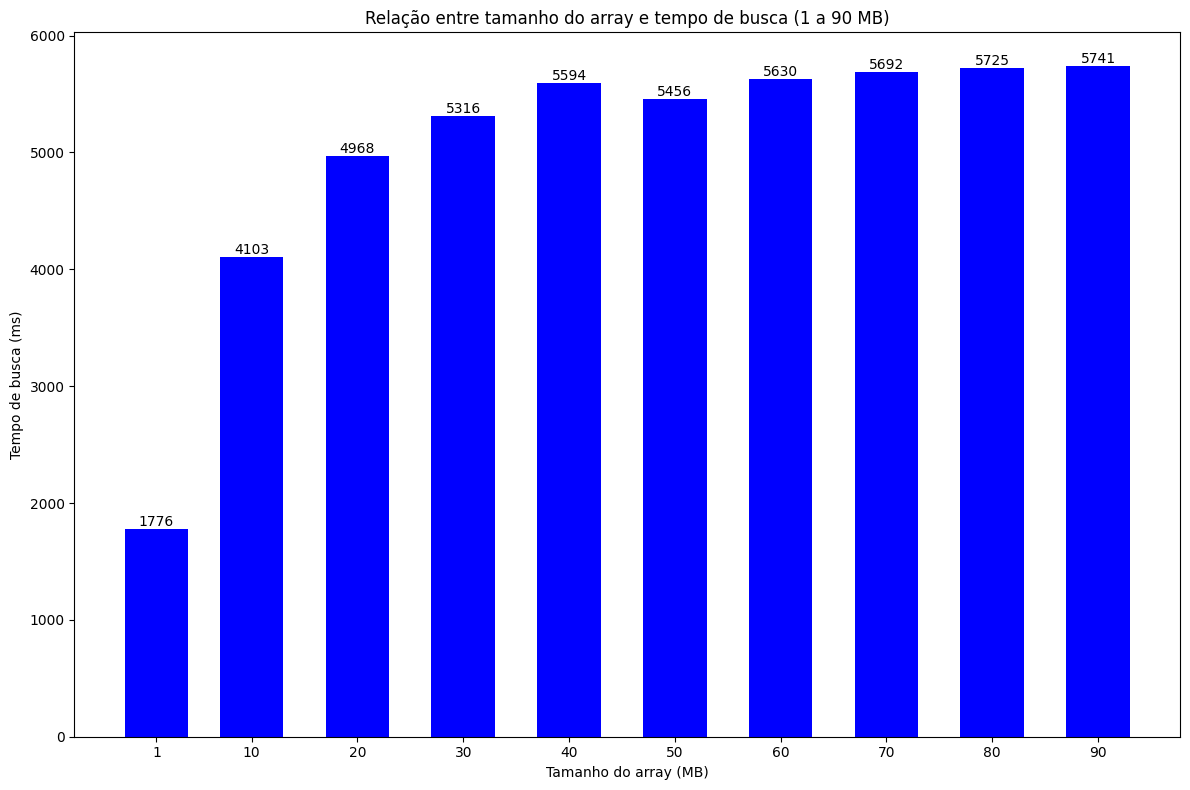

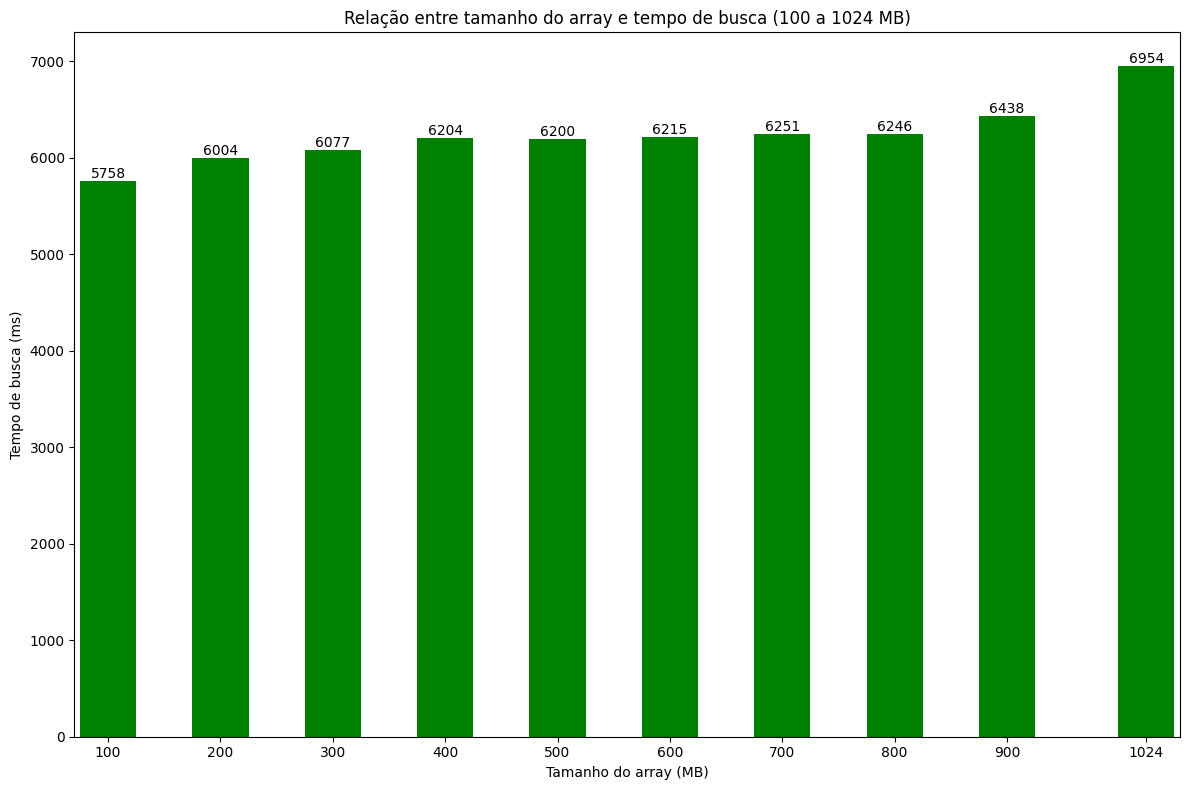

In [39]:
tempo_busca["MBinMemory"] = df_memoria["KBinMemory"] / 1024


# Separando os dados em dois subconjuntos:
df1 = tempo_busca[tempo_busca["MBinMemory"] <= 90]  # Valores de 1 a 90
df2 = tempo_busca[tempo_busca["MBinMemory"] >= 100]  # Valores de 100 até 1024

# Plot 1: Gráfico com valores de 1 a 90
plt.figure(figsize=(12, 8))
bars1 = plt.bar(df1["MBinMemory"], df1["SearchTime"], width=6, color='b')
plt.title("Relação entre tamanho do array e tempo de busca (1 a 90 MB)")
plt.xlabel("Tamanho do array (MB)")
plt.ylabel("Tempo de busca (ms)")

# Ajustando os valores de xticks para garantir que o valor 1 seja exibido
plt.xticks([1] + list(range(10, 91, 10)))

# Adicionando os valores de SearchTime em cima de cada barra
for bar in bars1:
    yval = bar.get_height()  # altura da barra (valor de SearchTime)
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), 
             ha='center', va='bottom', fontsize=10)  # Ajuste de posição do texto

plt.tight_layout()
plt.show()

# Plot 2: Gráfico com valores de 100 a 1024
plt.figure(figsize=(12, 8))
bars2 = plt.bar(df2["MBinMemory"], df2["SearchTime"], width=50, color='g')
plt.title("Relação entre tamanho do array e tempo de busca (100 a 1024 MB)")
plt.xlabel("Tamanho do array (MB)")
plt.ylabel("Tempo de busca (ms)")

# Definindo os rótulos do eixo X para valores de 100 até 1024
plt.xticks(list(range(100, 1000, 100)) + [1024])

# Ajustando o limite do eixo X para garantir que o valor 100 seja visível
plt.xlim(70, 1054)

# Adicionando os valores de SearchTime em cima de cada barra
for bar in bars2:
    yval = bar.get_height()  # altura da barra (valor de SearchTime)
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), 
             ha='center', va='bottom', fontsize=10)  # Ajuste de posição do texto

plt.tight_layout()
plt.show()